In [77]:
# %%
import pandas as pd
import os

dir_path = r"C:\Users\leere\OneDrive\Documents\Trading and Betting\Trackers\BF Bot Manager Monthly Records\ALL"

# Get list of all CSV files in the directory and subdirectories
all_files = []
for root, dirs, files in os.walk(dir_path):
    all_files += [os.path.join(root, f) for f in files if
                  f.endswith('.csv') and os.path.getsize(os.path.join(root, f)) > 0]

# Read CSV files into DataFrames
df_list = []
for file in all_files:
    try:
        df_list.append(pd.read_csv(file, encoding='utf-8'))  # Try utf-8 encoding first
    except UnicodeDecodeError:
        try:
            df_list.append(pd.read_csv(file, encoding='latin1'))  # Fallback to latin1 encoding
        except Exception as e:
            print(f"Error reading {file}: {e}")

# Concatenate DataFrames if any were read successfully
if df_list:
    combined_df = pd.concat(df_list, ignore_index=True)
else:
    combined_df = pd.DataFrame()


In [78]:
# Replace any occurrence of " backup" in the "Strategy" column with an empty string
combined_df['Strategy'] = combined_df['Strategy'].str.replace(' backup', '', regex=False)

strategies = ['Dogs - Back fav 1', 'Dogs - Back fav 1 backup', 'Dogs - Back fav 2', 'Dogs - Back fav 2 backup', 'Dogs - Back fav 3', 'Dogs - Back fav 3 backup']
filtered_df = combined_df[combined_df['Strategy'].isin(strategies)].copy()

In [79]:
filtered_df = filtered_df[filtered_df["Status"]=="SETTLED"].copy()
filtered_df

,Description,Selection,Bet type,Matched amount,Avg. price matched,Status,P/L,Strategy,Matched date,Settled date,Competition,Country code,Total matched on market,Loss rec. amount,BSP,Short description,Unmatched amount,Settle as win,Void bet,Settle as loss
116196,10:32 Harlow 1st Nov\A6 415m\4. Moaning Ivy,4. Moaning Ivy,BACK,£0.44,3.75,SETTLED,£1.21,Dogs - Back fav 1,2024-11-01 10:31:50,2024-11-01 10:35:13,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
116197,10:48 Harlow 1st Nov\D5 238m\3. Ard Amber,3. Ard Amber,BACK,£0.09,2.54,SETTLED,£0.14,Dogs - Back fav 1,2024-11-01 10:47:50,2024-11-01 10:49:28,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
116198,10:52 Central Park 1st Nov\D4 277m\4. Whats Up...,4. Whats Up Carmel,BACK,£0.09,4.00,SETTLED,-£0.09,Dogs - Back fav 1,2024-11-01 10:51:50,2024-11-01 10:53:37,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
116199,11:01 Hove 1st Nov\A9 500m\5. Swift Volt,5. Swift Volt,BACK,£0.18,2.66,SETTLED,-£0.18,Dogs - Back fav 1,2024-11-01 11:00:50,2024-11-01 11:04:59,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
116200,11:09 Central Park 1st Nov\A5 491m\1. Swift Ella,1. Swift Ella,BACK,£0.27,2.58,SETTLED,-£0.27,Dogs - Back fav 1,0001-01-01 00:00:00,2024-11-01 11:10:57,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148281,21:11 Central Park 26th Oct\A3 491m\6. Lindas ...,6. Lindas Grandkids,BACK,£0.05,2.80,SETTLED,-£0.05,Dogs - Back fav 1,2024-10-26 21:10:50,2024-10-26 21:14:11,NaN,NaN,"£12,132.35",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
148293,21:04 Monmore 26th Oct\OR3 480m\2. Vixons Filofax,2. Vixons Filofax,BACK,£0.10,1.48,SETTLED,£0.05,Dogs - Back fav 1,2024-10-26 21:04:06,2024-10-26 21:07:00,NaN,NaN,"£9,503.23",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
148300,20:59 Hove 26th Oct\A1 500m\4. Garys Angels,4. Garys Angels,BACK,£0.05,2.86,SETTLED,-£0.05,Dogs - Back fav 1,2024-10-26 20:58:50,2024-10-26 21:03:23,NaN,NaN,"£14,212.30",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
148314,20:54 Central Park 26th Oct\D3 277m\5. Boherna...,5. Boherna Bruno,BACK,£0.10,1.97,SETTLED,£0.10,Dogs - Back fav 1,2024-10-26 20:53:50,2024-10-26 20:56:34,NaN,NaN,"£14,455.38",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN


In [80]:
# Ensure 'Settled date' is a datetime column
filtered_df.loc[:, 'Settled date'] = pd.to_datetime(filtered_df['Settled date'], errors='coerce')

# Order the DataFrame by the 'Settled date' column
filtered_df = filtered_df.sort_values(by='Settled date').reset_index(drop=True)
filtered_df

,Description,Selection,Bet type,Matched amount,Avg. price matched,Status,P/L,Strategy,Matched date,Settled date,Competition,Country code,Total matched on market,Loss rec. amount,BSP,Short description,Unmatched amount,Settle as win,Void bet,Settle as loss
0,20:43 Oxford 26th Oct\OR 450m\3. Rioja Maxi,3. Rioja Maxi,BACK,£0.05,2.70,SETTLED,-£0.05,Dogs - Back fav 1,2024-10-26 20:42:50,2024-10-26 20:47:54,NaN,NaN,"£10,040.98",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
1,20:54 Central Park 26th Oct\D3 277m\5. Boherna...,5. Boherna Bruno,BACK,£0.10,1.97,SETTLED,£0.10,Dogs - Back fav 1,2024-10-26 20:53:50,2024-10-26 20:56:34,NaN,NaN,"£14,455.38",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
2,20:59 Hove 26th Oct\A1 500m\4. Garys Angels,4. Garys Angels,BACK,£0.05,2.86,SETTLED,-£0.05,Dogs - Back fav 1,2024-10-26 20:58:50,2024-10-26 21:03:23,NaN,NaN,"£14,212.30",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
3,21:04 Monmore 26th Oct\OR3 480m\2. Vixons Filofax,2. Vixons Filofax,BACK,£0.10,1.48,SETTLED,£0.05,Dogs - Back fav 1,2024-10-26 21:04:06,2024-10-26 21:07:00,NaN,NaN,"£9,503.23",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
4,21:11 Central Park 26th Oct\A3 491m\6. Lindas ...,6. Lindas Grandkids,BACK,£0.05,2.80,SETTLED,-£0.05,Dogs - Back fav 1,2024-10-26 21:10:50,2024-10-26 21:14:11,NaN,NaN,"£12,132.35",£0.00,NaN,NaN,£0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,13:37 Doncaster 24th Nov\D4 275m\4. Ballymac B...,4. Ballymac Bramble,BACK,£0.10,3.00,SETTLED,-£0.10,Dogs - Back fav 1,2024-11-24 13:36:55,2024-11-24 13:42:23,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
5817,13:37 Doncaster 24th Nov\D4 275m\3. Emers Hallie,3. Emers Hallie,BACK,£0.10,4.30,SETTLED,£0.33,Dogs - Back fav 2,2024-11-24 13:36:55,2024-11-24 13:42:23,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
5818,13:42 Sunderland 24th Nov\A4 450m\3. Machico,3. Machico,BACK,£0.22,3.10,SETTLED,-£0.22,Dogs - Back fav 1,2024-11-24 13:41:50,2024-11-24 13:48:21,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN
5819,13:42 Sunderland 24th Nov\A4 450m\2. Flying Se...,2. Flying Secret,BACK,£0.08,4.60,SETTLED,£0.29,Dogs - Back fav 3,2024-11-24 13:41:50,2024-11-24 13:48:21,NaN,NaN,NaN,£0.00,NaN,NaN,NaN,NaN,NaN,NaN


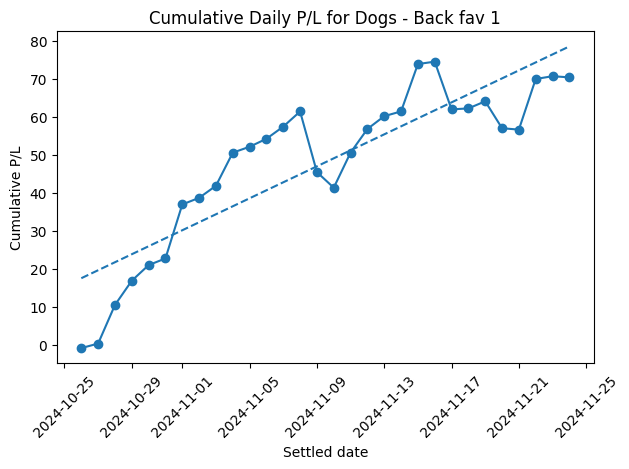

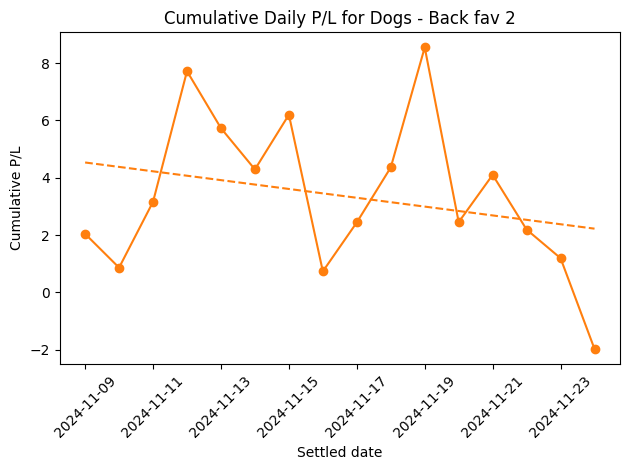

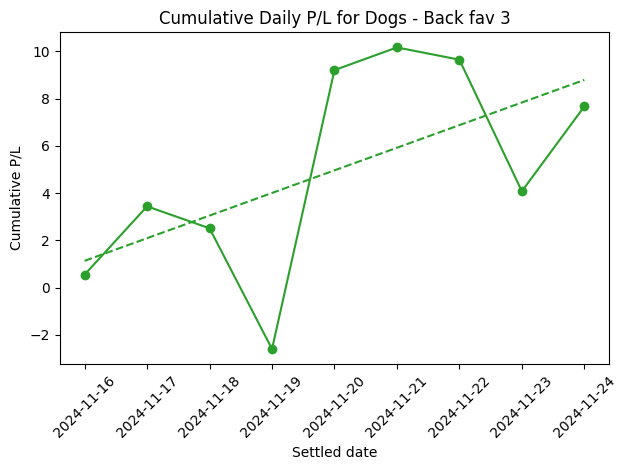

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Create a copy of the DataFrame to avoid changing the original
grouped_df = filtered_df.copy()

# Convert P/L column to numeric
grouped_df['P/L'] = grouped_df['P/L'].replace('[£,]', '', regex=True).astype(float)

# Ensure 'Settled date' is a datetime column and extract the date part only
grouped_df['Settled date'] = pd.to_datetime(grouped_df['Settled date'], errors='coerce').dt.date

# Group by 'Strategy' and 'Settled date' and calculate daily P/L
daily_pl_df = grouped_df.groupby(['Strategy', 'Settled date'])['P/L'].sum().reset_index()

# Calculate cumulative P/L by day for each strategy
daily_pl_df['Cumulative P/L'] = daily_pl_df.groupby('Strategy')['P/L'].cumsum()

# Plot cumulative P/L for each strategy with trendlines and different colors
strategies = daily_pl_df['Strategy'].unique()

colors = plt.get_cmap('tab10')  # Get a color map for different strategies

for i, strategy in enumerate(strategies):
    strategy_df = daily_pl_df[daily_pl_df['Strategy'] == strategy]
    plt.figure()
    plt.plot(strategy_df['Settled date'], strategy_df['Cumulative P/L'], marker='o', color=colors(i))

    # Trendline
    z = np.polyfit(np.arange(len(strategy_df)), strategy_df['Cumulative P/L'], 1)
    p = np.poly1d(z)
    plt.plot(strategy_df['Settled date'], p(np.arange(len(strategy_df))), "--", color=colors(i))

    plt.title(f'Cumulative Daily P/L for {strategy}')
    plt.xlabel('Settled date')
    plt.ylabel('Cumulative P/L')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()